<a href="https://colab.research.google.com/github/vladistan/wordle-solver/blob/main/SolveWordle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>   [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/vladistan/wordle-solver/main?labpath=SolveWordle.ipynb)

# My Wordle Solver

Looks like the `Wordle` game has taken the world by the storm.  Here is my contribution to this madness.  This interactive notebook provides the solver that comes up with the next best choice to use as a guess word.

Most of the time this solver takes between 3 to 4 attempts to solve the puzzle. The performance for the last two weeks is  on the stats badge below. Note that this statistics include older versions of the solver that had some bugs that affected the accuracy.


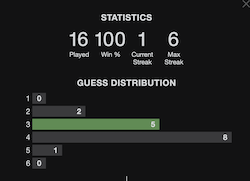


### How does it work?

Unlike other solvers on the internet this one uses both the likelyhood of the word to contain a particular letter and the likelyhood of each letter being at a particular position.  Unlike *hangman*, in the *Wordle* puzzle we need to guess both a letter and it's position.

A lot of english words start with the letters 'm' or 's' and end with 's' or 'e'. 

After the solver produces a guess word the user has to enter it into the today's game and provide the solver with the feedback.  The solver uses the feedback to cull the list of potential words and use the relative frequencies of each letter in each position of the culled list.

Eventually the list of alternatives becomes very small. When the list size is less than 3 words relative frequencies don't help anymore and everything boils down to the random choice.  Luckly the solver has 30% chance to guess the word correctly.





## 1. Initial prep

We need to do some initial preparations before we can start solving the puzzle.  Run all the cells below until you get to the section 2

### 1.1 Libraries

Import some libraries.  Nothing unusual,  just some standard things

In [ ]:
import re
from collections import defaultdict
from base64 import b85decode
import random
import zlib
import bz2


### 1.2 The dataset

Then we need a worldlist, you are not supposed to understand next 3 cells.  This is some magic we use to get the word dataset in the from we need.  The magic comes from another project that is used to solve the 'Evil' version of Wordle in the least number of steps. 

In [ ]:
c2 = """
LRx4!F+o`-Q(65bK<xk=6j^{^000Dk@IU|m^k5oRH&bl`Rb#lOmD>%uKmbqx1f&CS000g^eSkHi(}TW}ilTr3C4ImE0jhWq0D@>DXr@y=P-&oKl|qI934j7A`V9
(%X^lM;%4E$(dV#6o2$2m&6+hBQ10z8vs#JwAnJ1KK<5cwn36MgPM9O(5kkSS~0RI4wd*LUC!{y<h9j}gMHr*?t@h!<9kCp0kwq&q@YY}V|z<HH40=bu?4uq^db
M4u6{(O5ne4heA?|CVxOV~I`Aoz)NpsMF{*73Q~d^-tN_uP_!2j0)?o;9UyG-Ntys$EL@qXcCZmr+d2y?-mWJ#IayJ5!^j6%55oO|51o;xQ*er<#}u`9E{P0g>+
4f;^CD(s~W~G&k-?*#Q>*p`~dxUlNj3l4%kO1kMstKXO38cjtoVzII<eQOwec)4eH`UUO)<kA74(w!^{m*pZ?3e4kPBmb7*BPY3Iry%7h;;D!&VX!sP>Cnt(IoK
|@~#TI&cc4$htd68k6B1<UA>MxRJo;=t#3=y7_&#no*`9zd_1RbdM)Pu~v5cWt;{|c8kp-&<2-p%ww(dVRajW2Ft4sb^;&-L72i`cVX5&ZS%zXh>+_@0P6!S+zl
;@j5z8*|S-TWXDa#mw^A(TE=E#te+eoQ@=a3MC^&1tvPzfwz!fGC0>HJV?GEkExj-Ip2dE4o`*X)ShB?xm%e+)lQWau69$j8E$9L^Q#t*2wd_{(J7HR!3^N3v9U
$IIs56IQfDbVP#5@HG)UlySgF<`9jToZ`s5c+U3c4)^km&HZnd1o;CmwkK!(ZDgz-7nW6iE^PRwn@`bVTYBa<+zX4-O!n{_NI>dK3^0MlFWOZn@)^a;kt@kk;np
Qar$`%py*L@{|UXmm8#rZ@^z3XI6ybLor@nCsRiF-9qjxM4ye3WXHGBvK+lN?4D{a6T#adl_hfb{r>WeuR!?8TISi3rW+jK1>^%X&BK}^26v11&3RDFh~rHUXf8
|xhnTlBsIH(dEdXczpNh><bAPj8pKzSKnLqI9*94-Gm-HtU!iUSVbv4BmdM+Tf-FYyobp#jRH7<^J6i5TKR&-dAD8(NeSA8jM%5pvJo?ROJ-BWqY~pp<$UK^&r<
<u8&OPuioM?5s@NPt|NH}kdt~@%F_8@LX6wE-+XYyeXd}N=Wr(75KLd2vzbKgB5qVl1~sBB1TZS57<8JVDHAI^5EZNAn`*MdUN)b*QK^OawqVIc@F&$YNkeDvkM
v@G9bhDKz}zM+=x!dRrJn<vZPS?hnF4cL$31OTFY4+J(z6m~)dH~RAMnmSH$B3Z^hMQGJ`AX0&*)|}|SL2N*_DU^(idOsfie$zi%e=&KV(<j@A8#sl%=E~W^UGI
4ez>u{-+e9vU<(I?cx(gp1h1;*XsxWsh?DL3tgxI@<)kvPkuMdR+1Qo7CSSwlFOwaGvp3A~{CH3esrO)bS8CZ2{nV+o9DU)Y)cc(^(N{MIfBM2i{TEn9Qg4<!Aw
sHsvcE+Da@?KMALqdrOUf~n~fNxYN`d%~VpCH-7K5f?$GK#2}AuwoI=Ge88SsR$aHEM4;9UMn$5MIaEx4)hff$d3DchAn#(<F$by^*jpV<bZ!l>9J<*@FZ?kJ?G
wZFAyWudfKcj6gb>mzXPt-vnOxw;Fzl+hRShf-DAw*{XJfW83BRArL`BvLPcpROIr&X+m)YB7}l8g+|pO+tQIVq}eD_B|{K9DY1qU0=hQ<Y0+BCp{Nw}EWs}<iq
s2}a$v3FROnwaoU&<A*%)4Pjg@$rd`pUjW!)#Rj6zDG$lZ~ISmPL*)mF7?OB-dij@4Fcb0BFIYPCQ!RYP}ews(lfj`)JLy34AQEeRDpo?~hnpYh9DTS1<I9a7re
-7y+xZ_d`&u(;T{OQ8!%%#$>GBnEJ8_f^&pDcTZju5<)*y#my;#8`+oOu|zbU}z9#npCGs5DFQWy66DQ>dbti0C~9IBw$0)Al%;4!g6+C1aWeBA>`D?>wSs<Z;n
SF6<coeXE#Mv=c<Ju{Bx(dNu6C?nXF)aAqm$kT+D#zP*(?XmK+3D(z-ImSC#a=_8O%b>F~RlB<iXvMj6h_-ywn{)E8DQhzXfXcTz$j9Or-@D?|o2FCMvd0s`u*#
ZdusE|#5cU<kIHYt%$QTm_ir+Yn}2G9WJEk*nf3?nk{U9Xs@^%iKM3D~btbPbs5M200tSROK$Iu3Cw*%^N_9p_N&goJ`*<o|B0COzBh4wggJMH;P07dAi<+4LP9
=SF8XZ9=XnXq6TwSi(m({$#TdL!8+Y%V=QA3B@B4d014MN*^bWxJvCX;D<e3wtfogSfg$3pX8E_x@WaYblzTCX-oDEi`=-F6ju4VB)STyUa}fiW1_?1IDqxMutc
U_cgnKJ?V+ci%8SQ{4EXs*J&c%ZOg%L414>h*}2JzE|EQCaX88<d<<irRAuFYNJu@L6<UMqdr1R8yfHX?>{LWMpZx-Qq8&Qgbl_iNJZ(@Nwp7H>JBms@XVI{D2%
U9V76L!S=Jv1NHl9%N4uMiu3$p#v|~5|?z0awM35QBG1Qhf+Z4d;q#JlPeQlQXqCxX45Jn2V~9+r~^AE9_&D^y;%|4T(ALCx0wPIVX55JJh)rC)oBk-<9pTFjY<
=jJ$mV1mFGI~LjkFcp1PBFe#GZ5RK6J7-)M>8%m8j;E&v6~7*T<RDS@CxO1#|;<vD;Y+jjFrKzo%`oWpGh7XfYK)<g)r+}Id$4$TN`MVJu+q9DW~DAf=F%wD~s>
!-!#6}xjoXoYy|L-5^p)YW>thIgkp&v{mxI>Njob^7;dURta(mAfY>BCUsoB!#R9@>)(#qso8_r6pt<8_8C>mbXA}YJe0LH+J*{HE38cDDD7((<@peWtO8bM(pN
YL~B)4bzKr1fCQDdQDqx2k^lhi1^^GO+7G5rORe>rYR6nL*;=f~En1KWMi7WdpfK5ZH#N>)wr2Sj3!yn#w2hbrp+pj6szztMA#(~m<r`BHW80H#LrQ?N8^R=QI<
#UHTd*NYNf|8wCM90&jA#JuR<x`DG~KPRAt*#v<FSNb0|jQ@)osK>YZc}0y8saE$%EDFzet>_uDlE0?Vkp{s&wuktBq6blj)ihdi+qKIhSpT9*vx>72dx|Mf-hx
^V<+TJSk>Si@e6PKzeeq$PjX7qzDft>|3!AwkXA$D<#fo!U8Os+t#sQMp^|JbGe!XwmrCwz4h694vGC?@dsTu@B$IC)MO#?QX;=_MVVm^MpGu8XGq4EqW-@q3KR
%M|98qYPe#^@j6MWQLs~q=3feu?@%b;|0~e3{prv7_w=XK@<+6><M)YAEv{+<mA%ikQ%Yso3mEMvjb?0dgc)0$5%Uae#<{e6KxQS`?%*ucb%D_n2imx$FVKG{t7
m%Q^Ni0&r7F0QKOFPc7H>IxC<69fXw>WE#>M3If#%M?+cD5zLyr3B8F)|$UB#2~vlB#5=sLYv~x~u}64=j(O<C>{(%Lxh?&G+z*REG(DM}|hAXhT-dT}*5H4$w#
?MX5Ha7UV>`4+e0T5Hn+2Yl~h-ct%{==+oRDbA1^TacV_nJRM?tCZEZ?r1FT#EcO!wXdtoT@8`fX%nQDZbBk}uKs}`Npp9T&aT`)%^v$;HL%z=goxD%8@BwLSAg
@F**fOdcV^!|_TJxM1WJk2(%a!qa%KOE2V3Z=Qu_J<B_stuWBNE)ZQZBm1l6>+<z`<z_=G|sVOjP=}Rw6nvPj@sjnCq%X1eg|iwm}k}Uu0;DViKikgT<k~hj6RD
@f+|hRtGN|M~$V!pb0V?)N6sw@8a#jn_8_@5h<40#kLNu4#4fT)nT=mi*z$ADcr(Y7ni#893JhB!LGTk2wQk=^s5UBmGY3^1md-dxc=^7n<Ww?T#3t?hx3Wgd4r
hVb1jvQ&&KnP@Jp}}5rm+k7?lyhlnkH<=Q61fG&p5C$^_OGc*<&zS>a(vsp6)<mptenah9fus>Wtp)LABI9Ls`CD>n&3o7Ezlr8mQ2At_iRAhJ&-HyN0P<l3gMC
#INZl5TD>K`7G^IAckuRpk*oZZT-XzHu?0c8Vzo3+rvPNQY8lklO_KjN)+4PATM<S(k)gPmf+u+KIw%%v&BVce@9tM<%6|^+-#h#iF`eqoJsL1W#h*5)y*cvi2z
y9`25-12=`?7Be5rp^I&e=GOAcK}*u85fum~rX2yBF>6C9qGQAiZ$PP@gkFwY^(k=T&_T(xS1U>g*=r>^S1r3a66<(9ve1a3Oz3iA5D+=VLP;UDrX7P~X2K@TL&
BXS2WU8)jkO9hlFGA2itO+efgFn@q_R2$5MhjQb%nvg2aU@FLa~#BGtOA<g)Axp)S(dN8I?_iJe`&{DAp}%%DCQ+YdFawaF$+lM6~H6v(th$I7D3PB<d+TMz>(5
;ow^;KO4mD89?b!b1S`Jz2}?Tc)p``cLE(V%HCU<H(MKX2Zg!}lb?S{$|$-wj$;8t7$lN{WF*KY6iEbu8U(V@+g}Aj3P>F*Oq7Ml^nuYz9(sFS{ysK-J$w6iABX
JMgBG;e^&!`?j3p5O=#6@j2xKF$bQ*F-(83XxnPwmn8!VG)Xv7ekIBYPXh$0ctM?`$6VM@5fgx%ZI2C6vjqY<8lRb5*|z-~zpMv=5d8=-QCmmIYvmR9xIaa7!_c
XFj;EUcxf1(_<I$F5;?tp-p<s7tb<NkmBrAfawKK_iY4iZ<RT+trAmD4O=_zCRUZu#;-V!u2Ue#ucN?A>FAib9!Ldx@`2Yl;UeFJ_o$~opZfu8z5nYk*Mquhv%B
(inDbAi5EA<1u1J*iYU}sW}fY6i)eE0CUv59OGtwtOcG*}Xf}aOt%gY?lt5=p5C|;M4iBdw^e@ML#tA0M$I&(HiK9MyXKUb=#KkEjJ7*KQ+q7tH)#rX+360C!8}
^u_GtQl8H}Utdg_Wz}Sg=0c`DIqF$B&fDVedFSJbGNt4mn(1PLEaHa_KC!3=0>1)!$*+XBtIOheZ^SMJ_Pg&d#5YUp_dEP+<91;)bhDcB8qRXAtpCNYd{Z!r4=e
kr5#YC6*FixHtxKlJuY`&jJ?U^Bvu2XF5peB9&^w-f_HlbXwro1qtPE3p&dyEYTI9M2J>_LL~(llJgn4+DF4uIE|Aj3htDhF#;GUl0fLPyh=wE=8n*k^LOSnwv0
fpP;;CtN_Q<EFBs(Z|2EhU?!ttl?Sr%^e<fmxpt*WxiXTbAKeet|7Bpi*DU5CGSlvYrS?!n{lnLcNR{1K0q4ltmJ{UPW#U}}&rs;+g6$JIMx#w)t5g^RAiq`ioL
~ZG-XXdSV?y9*kqL9*TZD>GJLnJ6m*8s>~`5v+IgzYz)(L{oTqY_XwS~6?<yChOfWeI;S1p-2i8)HTEUjG+lHSg81a(PJNl*mLCp<qMKO{DE^F^UqHB8(<9YtGu
JT&n5e*JEgyHzK*tJa)w8E=^Tni++9B#qC{8m2;Zkb<39Jgr*ru6}&nkV>U+cxgbSF7ps-%=~(r0_ACS{68ojyA+bePxocC$GNKq!=~k(#xnouYur>rEENovsxu
kDS_xRT>078V!Yw-DX_IoW;YhG$LEK*Pvp3dAN@vW)7TJS5HwasAGH3H2u8qs1X*7o;pjBOeX8+lr(T#Ai-*1juV8jXLJ*I!=yJ$^mruT`!ke`eL+F1fKbWT4o-
O~<#j&At}Zb;Mwbd3PgFYvI>MBl1^Ye&kIHdR9`Z&2vGtZ?kS=`mSPvF>Dl862Vw}{+=~>m3V8W18OW3NFi6d+uqG>HLc`iLl9#kC^5C>)#SI;UO@^kM!ATzRA|
?xwz9Q!)~~^GN+c<%8YBufg8>vqE$~;Cv@!I6C=H<Vm2%X)Vbl{ecwk`@!ZN0bn&}8|(vQ4=)KXSahJskUY_+;$Vxz52MHHB#Bmi%<E|3yaj2eNE$OJ}2T$3$(d
3i1(`}6-Fo2Ff%_xbOywMe7|wcF=QVg8r(58Y-G4fp9&1V8paNW>)>{WIVFkN%nMc^x^}%c%cZqx`qmEYn^-+v;XT#1CtCy*Z3zvR_4KOjW@U_ZY3{aQco}w?c7
l4Pasi|8pU7ri>K~;S@X-vHjzSG;InnoHT<ZqwxWx7ZA8$+rbB~^uS`<<uF|Nlho9c_UD=IvXSgqG5B1S7We1p;kCJzo1ONr9=N*+7aWB}8~B|<e*WQNXsWBIIL
qle=P*B6j4+4k&Yp2j^=Z@Yi!^+G9px)u_Ft=!Te(FO@Zg8=yIub{<2U*B^&hBps*x1`O1S*2{*pe)POsm|(mqKpUm-!|d(Y+NHjgpVEEm90I6DZDaEaiTJIYOy
GbAVVUo6_=b@@Hv(N+-X7uzN`@g!;B`AO0cM~qZv3>2V=GFm}N160t6Q2qF<mCKdS>$cm9+rKf-F(QbHq5_SNo+)2M(^z=>`|;~CczEB-ez4!zeqY{qtvQG+Hoh
lM4WfQuzc16OB#a_-s<8U}oW&sj$fW^ICJAcRQ&JBxgpEvMelav?l%`lY6R=_fY)x$UXd_dWNp0)l>%R%&R6>Vy7OwEyF+ScN9!?axnTU}6rDI6B0xQeKnKUJeO
g)Az^-mDT&FT42L?}-$21%G<H?6Sr{pvqOUlg~z-{~_g5Sc$%PFedpFdGuYt<-eiqI-0d>AV!2oI19KS03jbeb4FAFLd8O{x0N-aG@dkN`cw"""

grp = {
        i:[v.split(':') for v in x] for i,x in[(i,x.split(',')) 
        for i,x in enumerate(
            bz2.decompress(b85decode(c2.replace('\n',''))).decode('utf-8').split('|')) 
        if x != ''
]}

def get_words(grp=grp,s=600,pfx=''):

    for n in grp[s]:
        try:           
            yield from get_words(grp,int(n[1]),pfx+n[0])
        except ValueError as e:
            yield pfx + n[0] + n[1]
        except KeyError as e:
            yield pfx + n




### 1.3 The helper code (filter class)

This class implements a Wordle filter object.  You supply it with the guesses you have used so far and the responses that you got from the game.  In turn this class tunes its filter to let the potential candidates words through

In [ ]:
class StateError(Exception):
    def __init__(self, *args):
        Exception(*args)


class InvalidInput(Exception):
    def __init__(self, *args):
        Exception(*args)


class WordleFilter:

    def __init__(self):
        self._guess = None                    # Current guess
        self._neg_letters = set()             # Set of rejected letters
        self._pos_letters = set()             # Set of accepted letters
        self._exact_letters = ['.'] * 5       # Grid of letters in their correct positions
        self._exact_neg_letters = ['.'] * 5   # Grid of letters that should not appear in those positions

    def guess(self, word):
      """
      Supply a guess
      """
      self._guess = word

    def feedback(self, fb):
      """
      Supply the feedback we got from the game
      """

      if len(fb) != 5:
          raise InvalidInput(f'Must give all feedback positions, got {len(fb)} : {fb}')

      for i in range(5):
          if fb[i] == '?':
              self._neg_letters |= {self._guess[i]}
          elif fb[i] == 'y':
              self._pos_letters |= {self._guess[i]}
              self._exact_neg_letters[i] = self._guess[i]
          elif fb[i] == 'g':
              self._exact_letters[i] = self._guess[i]
              self._pos_letters |= {self._guess[i]}
          else:
              raise InvalidInput(f'Unrecognized feedback {fb[i]}')

      self._neg_letters -= self._pos_letters
      self._guess = None

    def filter(self):
      """
      Returns the filter function that reflects current state
      """

      def flt(word):
          return all((l not in word for l in self._neg_letters)) and \
                  all((l in word for l in self._pos_letters)) and \
                  all((a == '.' or a == b for a, b in zip(self._exact_letters, word))) and \
                  all((a == '.' or a != b for a, b in zip(self._exact_neg_letters, word)))

      if self._guess is not None:
          raise StateError('Must enter feedback after choosing a guess word')

      return flt


## 2. The Puzzle Solver

Now we can start solving today's puzzle.  Open the [https://www.powerlanguage.co.uk/wordle/](httpshttps://www.powerlanguage.co.uk/wordle/) in another browser window and execute the following cells.

### 2.1 Initialize the filter

We need to initialize the solver first by creating a blank filter and initial word list

Run this only once per each puzzle

In [ ]:
## Run this only once per puzzle
ll = list(get_words())
flt = WordleFilter()

### 2.2 Get the next guess


Run the cell below to get the next guess to use

In [ ]:
# Intialize some variables
lpos = list(range(5))  # Position to try next
ll = list(ll)
wrd = ''

# We'll run until we run out of positions to change
while len(lpos) > 0:

    # Using the current wordlist compute the frequency of each letter in each position
    fq = [defaultdict(int) for i in range(5)]
    for l in ll:
        for i in range(5):
            fq[i][l[i]] += 1
    
    # Compose a candidate word by selecting the most frequent letter for each position
    cand = [max(fq[n].keys(), key=lambda x: fq[n][x]) for n in range(5)]
    wrd = ''.join(cand)
    
    # Print the word we have came up so far
    print(wrd)
    
    # If this word is in the list we found our best guess
    if wrd in ll:
        break
        
    # If the word not in the list we need to make some adjustments

    # First let's find out which letter we should keep
    # we keep the one that gives us the maximum number of possible words
    # in the end    

    # Note we only consider positions that we did not pin so far
    # At the first iteration we don't have anything pinned, this means
    # any position is up for grabs 
    pfrq = [fq[n][cand[n]] for n in range(5)]
    mxk = max(lpos, key=lambda x: pfrq[x])

    # Once we chosen which letter we keep, we filter our word list to
    # keep only the words that have exact letter at the postion we have
    # chosen for pinning
    ll = [l for l in ll if l[mxk] == cand[mxk]]

    # And now we pin this position, i.e. it will be excluded from the rest
    # of the iterations
    lpos = [l for l in lpos if l != mxk]

share


In [ ]:
wrd

'share'

### 2.3 Enter the guess

Enter the guess shown above into the game and modify the line ```flt.feedback('?????')``` to reflect the feedback you got from the game.

The feedback is a string for 5 characters,  each character can have on of three values



| Value  | Meaning   |
|--------|-----------|
|  ?     | for the *gray* letter, mystery word does not contain this letter  |
|  y     | for the *yellow* letters, mystery word does contain this letter, but it's in a wrong position |
|  g     | for the *green* letters, mystery word does contain this letter and it is in the correct position   |




For example you guess word was `penal` and you got the following feedback from the game





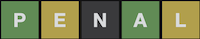


Your should change the line below to be

```flt.feedback('gy?gy')```

After you change the feedback value, execute the cell and move on.

In [ ]:
flt.guess(wrd)
flt.feedback('?????')

Now let's generate the list of word that satisfies the feedback

In [ ]:
ll = list(filter(flt.filter(), get_words()))

Let's see how we can use our next guess

In [ ]:
len(ll)

238

And now we should move on to compute the next guess.  Go to the section 2.2 above and repeat the process. If the number of possible guess is very small you can use the cell below to examine them and try your luck by picking a random word from the list.

The performance of this solver degrades when the number of possible choices gets very small.  If there are less than 3 choices left it is pretty much a random guess.

In [ ]:
ll